# Introduction:
Our group project aims to determine which "kinds" of players are most likely to contribute a large amount of data by analyzing play time with personal history with Minecraft so that the research group can target those players in their recruiting efforts.

Before players begin the game, they are required to complete a survey providing basic information such as gender, email, name, and gaming experience. This data enables us to build a predictive model to identify players who are likely to contribute more playtime, allowing for more convenient and effective research efforts.


# The Data Sets:

 `players.csv` dataset contains 196 observations and 9 variables. <br><br>
         Variables: <br>
        <blockquote>`Experience`: What their previous experience with Minecraft is <br> 
        `Subscribe`: If they are subscribed to email updates or not <br>
        `HashedEmail`: encrypted format of their email <br>
        `Name`: Name on plaicraft.ai <br>
        `Gender`: recorded gender <br>
        `Age`: recorded age <br>
        `individualID`: individual id if available <br>
        `organizationName`: Name of associated organization if available <br>
        `played_hours`: total hours contributed on plaicraft.ai<br></blockquote>

    
`game_time.csv` has 1535 rows and 5 variables: <br><br>
    Variables: <br>
    <blockquote>`hashedEmail`: encrypted format of their email<br>
    `start_time`: start time of session<br>
    `end_time`:end time of session<br>
    `original_start_time`: start time of session in reference to POSIX<br>
    `original_end_time`: end time of session in reference to POSIX</blockquote>

In [52]:
#loading libraries
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(dplyr)
library(caret)

#set seed
set.seed(2024)

In [53]:
url1 <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
url2 <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
play_data <- read_csv(url1)
session_data <- read_csv(url2)

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [54]:
play_data_select <- play_data|>
                     select(-individualId, -organizationName)

session_data_select <- session_data |>
                        mutate(start_time = as.POSIXct(start_time, format = "%d/%m/%Y %H:%M"),
                        end_time = as.POSIXct(end_time, format = "%d/%m/%Y %H:%M")) |>
                        select(-original_start_time, -original_end_time)

combined_data <- left_join(play_data_select, session_data_select, by = "hashedEmail")

In [55]:
play_data_mutate<-play_data_select|>
#mutating genders other than Male and Female into a catagory "Other"
mutate(gender = case_when(gender == "Agender" ~ "Other",
                          gender == "Non-binary" ~ "Other",
                          gender == "Other" ~ "Other",
                          gender == "Prefer not to say" ~ "Other",
                          gender == "Two Spirited" ~ "Other",
                          gender == "Male" ~ "Male",
                          gender == "Female" ~ "Female",))|>
#omitting NA responses
        na.omit()

In [56]:
#splitting the data set into training and testing
minecraft_split<-initial_split(play_data_mutate, prop=0.75, strata = played_hours)
minecraft_train<-training(minecraft_split)
minecraft_test<-testing(minecraft_split)

In [57]:
mean_play<- minecraft_train|>
group_by(experience)|>
    summarize(average_hours=mean(played_hours))

In [58]:
plot1 <- ggplot(minecraft_train, aes(x = experience, y = played_hours)) +
         geom_bar(stat = "identity") +
         labs(
              title = "Figure 1.1 Total Play Time contributed by Experience Level",
              x = "Experience Level",
              y = "Play Time (Hours)"
              )

plot2 <- ggplot(minecraft_train, aes(x = gender, y = played_hours)) +
         geom_bar(stat = "identity") +
         labs(
              title = "Figure 1.2 Total Play Time by Gender",
              x = "Gender",
              y = "Play Time (Hours)"
              )
plot3 <- ggplot(minecraft_train, aes(x = age, y = played_hours)) +
         geom_point(alpha = 0.5, color = "blue") +
         xlim(0,50)+
         labs(
              title = "Figure 1.3 Relationship Between Age and Play Time",
              x = "Age",
              y = "Play Time (Hours)"
              ) 

plot4 <- ggplot(mean_play, aes(x = experience, y= average_hours)) +
         geom_bar(stat = "identity") +
         labs(
              title = "Figure 1.4 Average Play Time contributed by Experience Level",
              x = "Experience Level",
              y = "Play Time (Hours)"
              )
#limited y axis due to outliers so we can visualize better
plot5 <- ggplot(minecraft_train, aes(x = experience, y = played_hours)) +
         geom_boxplot(fill= "blue") +
         ylim(0,3)+
         labs(
              title = "Figure 1.5 Play Time contributed by Experience Level",
              x = "Experience Level",
              y = "Play Time (Hours)"
              )
plot6 <- ggplot(minecraft_train, aes(x = subscribe, y = played_hours)) +
         geom_boxplot(fill= "blue") +
         ylim(0,3)+
         labs(
              title = "Figure 1.6 Play Time contributed by subscription status",
              x = "Subscription status",
              y = "Play Time (Hours)"
              )

## We created a total of six visualization of the dataset to help us figure out what types of players contribute a lot of data.

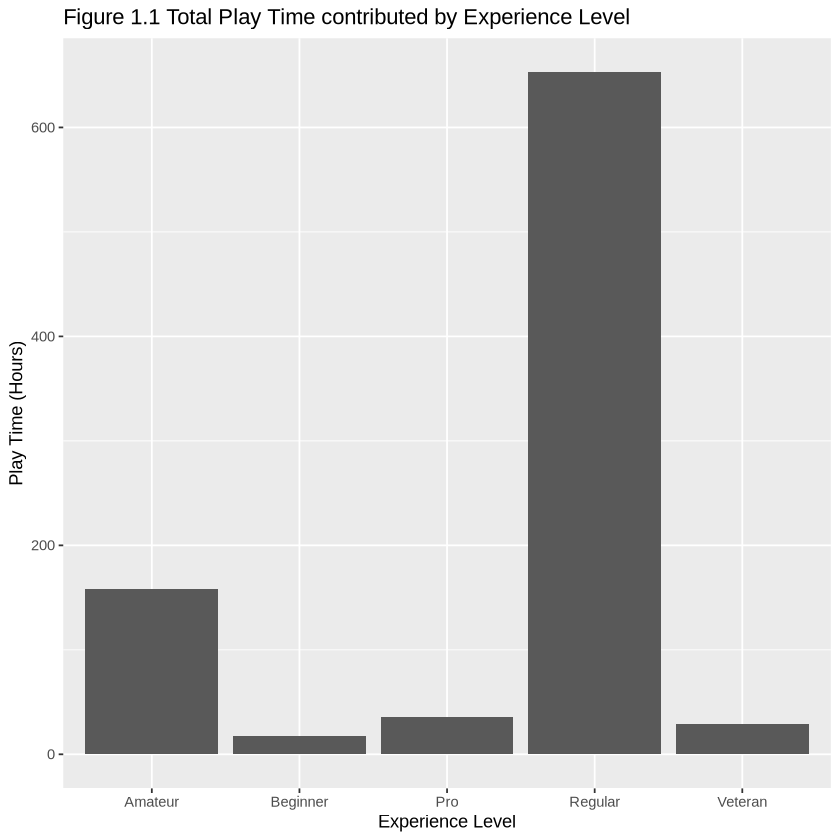

In [59]:
plot1

Figure 1.1 shows the relationship between experience level and total game time and finds that “beginner” have the shortest total game time and “regular” have the total longest. 

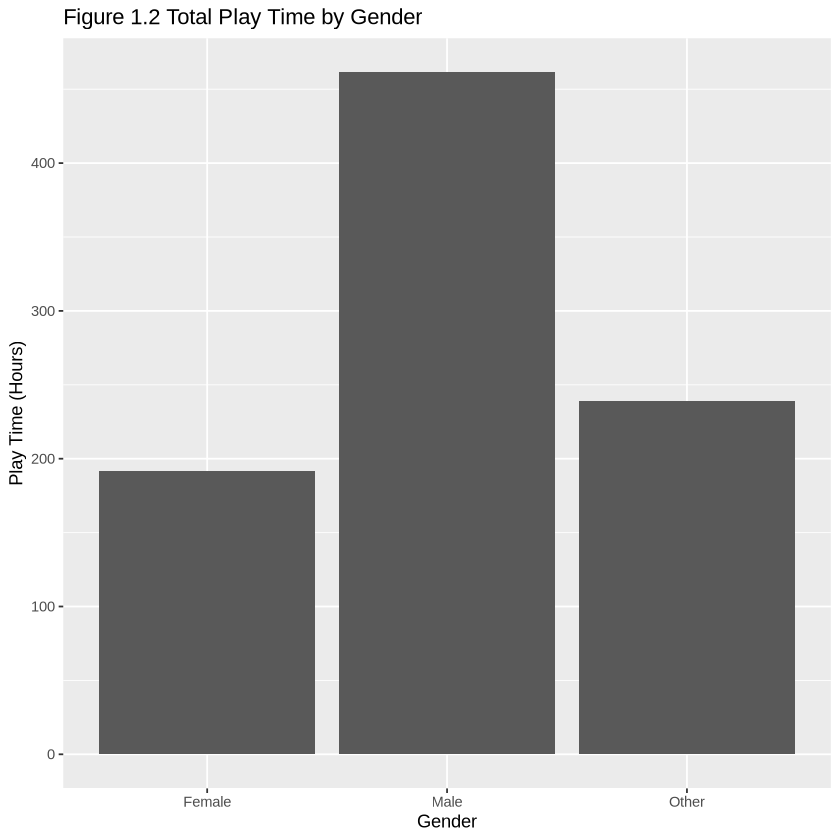

In [60]:
plot2

Figure 1.2 shows the relationship between gender and playing time and found that men play more than any other gender, so it can be concluded that men are more likely to provide a lot of data. 

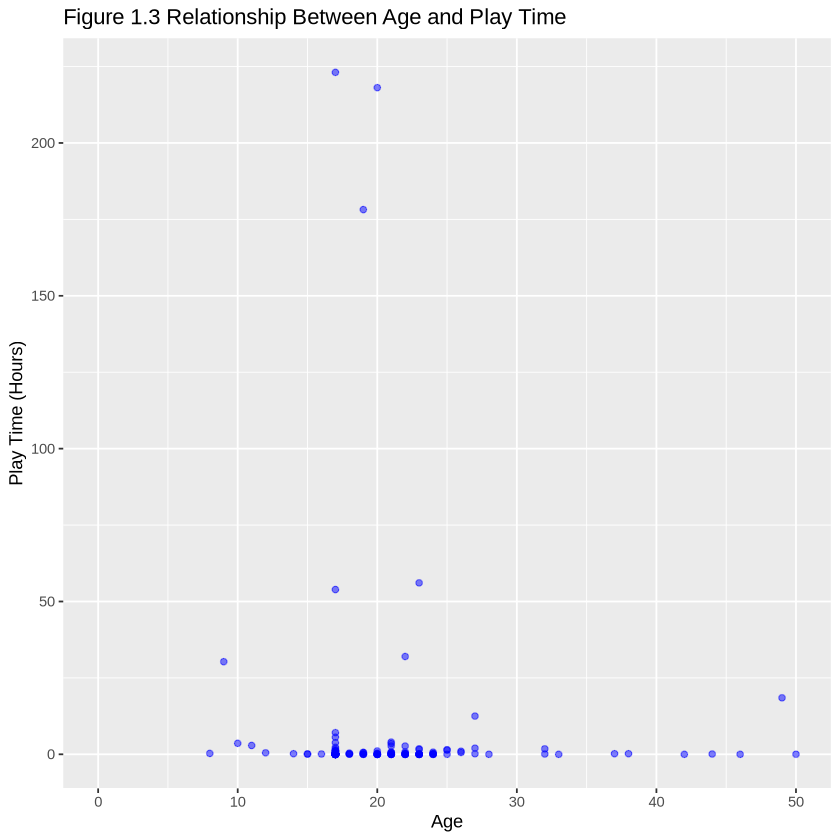

In [61]:
plot3

Figure 1.3 shows the relationship between age and playing time and found that the majority of players were between the ages of 15 and 25, so it can be concluded that players between the ages of 15 and 25 are more likely to contribute a lot of data.

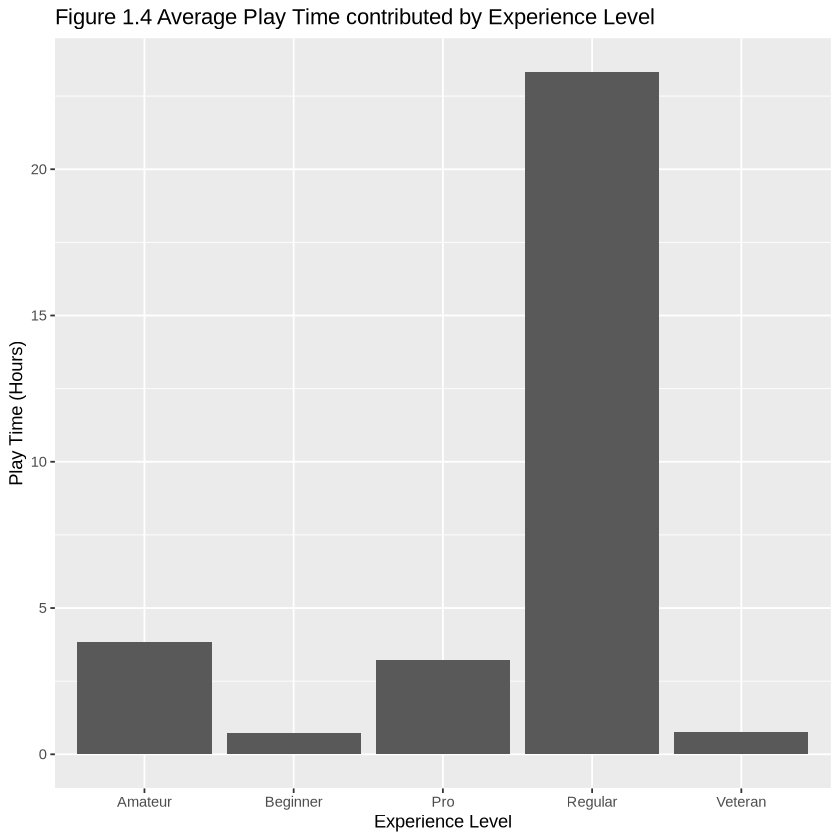

In [62]:
plot4

Figure 1.4 indicates the relationship between experience level and the average play time, and it was clear that the average length of play for “Regular” was much higher than for other groups.

Warning message:
“Removed 15 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


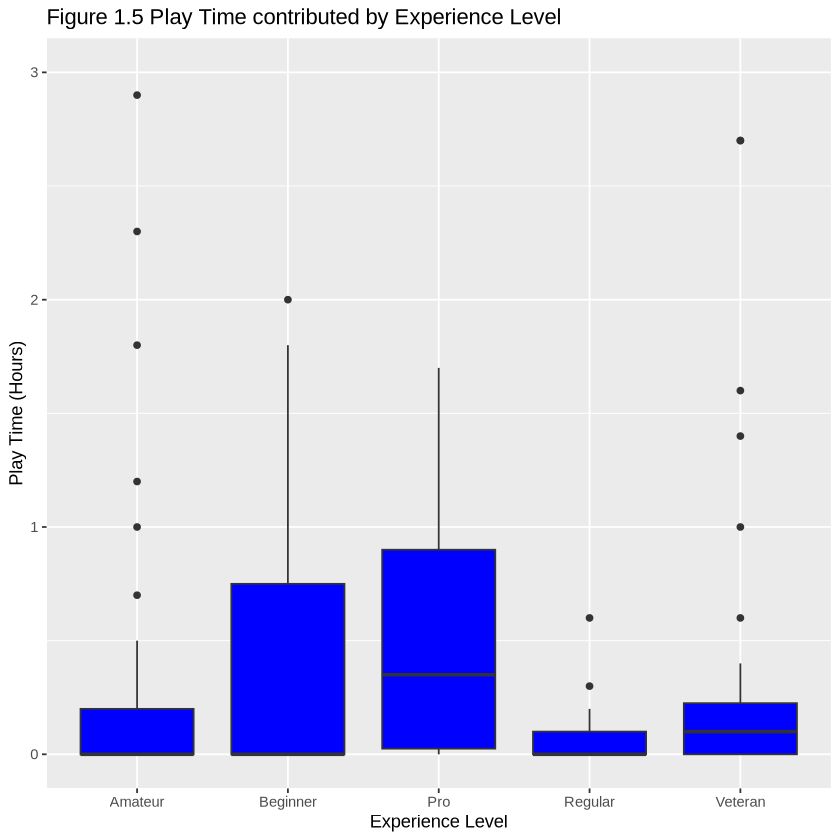

In [63]:
plot5

Figure 1.5 studied the relationship between experience level and playing time with a box plot, which showed that the median length of game time of “pro” people was larger, so it can be concluded that pro people spent more time on games. 

Warning message:
“Removed 15 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


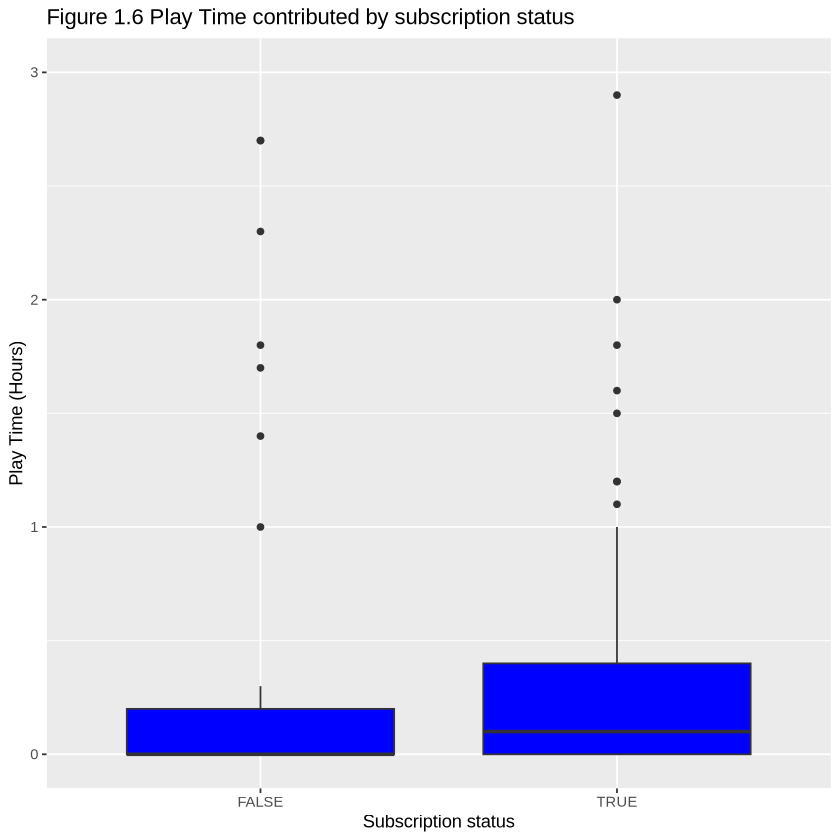

In [64]:
plot6

Figure 1.6 indicates the relationship between subscription and playing time and found that subscription players played longer games than non-subscription players.


## Creating the model
Our group decided on k-nn regression. With one-hot encoding, we are able to use this model by assigning numerical values to catagorical values without introducing hierarchy. After one-hot encoding, we  standardize the variables. We then run a 5vfold on the training data to determine the best k-value. Then we run it again on the testing data to determine the accuracy of our predictor. Using this data, we can predict what types of players are likely to contribute high amounts of play time based upon gender and experience.

In [65]:
#dummifying the training variables
minecraft_train_select<-minecraft_train|>
select(experience,played_hours,gender)

dmy_train <- dummyVars("~ .", data = minecraft_train_select)
minecraft_dummy_train <- data.frame(predict(dmy_train, newdata = minecraft_train_select))
head(minecraft_dummy_train)

#dummifying the training variables
minecraft_test_select<-minecraft_test|>
select(experience,played_hours,gender)

dmy_test <- dummyVars("~ .", data = minecraft_test_select)
minecraft_dummy_test <- data.frame(predict(dmy_test, newdata = minecraft_test_select))
head(minecraft_dummy_test)

,experienceAmateur,experienceBeginner,experiencePro,experienceRegular,experienceVeteran,played_hours,genderFemale,genderMale,genderOther
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,1,0.0,0,1,0
2,1,0,0,0,0,0.0,1,0,0
3,0,0,0,1,0,0.0,1,0,0
4,1,0,0,0,0,0.0,0,1,0
5,1,0,0,0,0,0.1,0,1,0
6,0,0,0,0,1,0.0,1,0,0


,experienceAmateur,experienceBeginner,experiencePro,experienceRegular,experienceVeteran,played_hours,genderFemale,genderMale,genderOther
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,1,0,0.1,0,1,0
2,1,0,0,0,0,0.0,0,1,0
3,1,0,0,0,0,48.4,1,0,0
4,1,0,0,0,0,0.1,1,0,0
5,0,1,0,0,0,1.0,0,1,0
6,1,0,0,0,0,0.7,1,0,0


In [66]:
#creating the model

#using cross-validation to choose K

#create recipe and scale
minecraft_recipe<-recipe(played_hours ~., minecraft_dummy_train)|>
                  step_scale(all_predictors()) |>
                  step_center(all_predictors())
#creating model specification
minecraft_spec<-nearest_neighbor(weight_func = "rectangular",
                                 neighbors=tune())|>
                set_engine("kknn")|>
                set_mode("regression")

#create a 5-fold cross-validation object
minecraft_vfold<-vfold_cv(minecraft_dummy_train, v = 5, strata = played_hours)

#creating a workflow
minecraft_workflow<-workflow()|>
                    add_recipe(minecraft_recipe)|>
                    add_model(minecraft_spec)

minecraft_workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


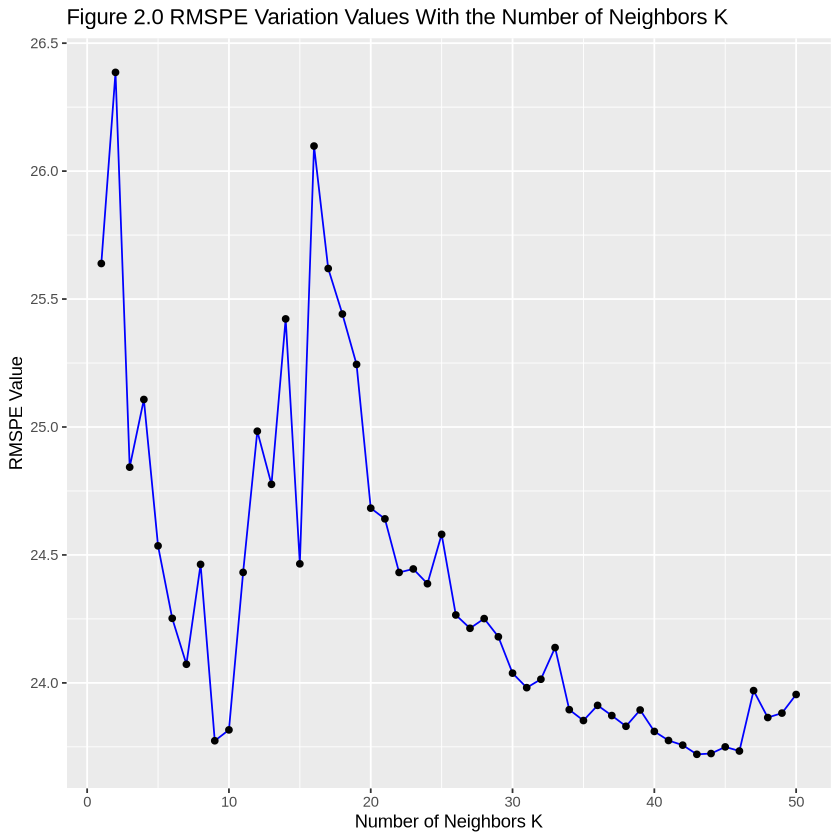

In [67]:
#run cross-validation for k between 1 and 50

gridvals<-tibble(neighbors=seq(from=1, to =50, by=1))
#results
minecraft_results<-minecraft_workflow|>
                   tune_grid(resamples = minecraft_vfold, grid = gridvals) |>
                   collect_metrics() |>
                   filter(.metric == "rmse")
#visualizing results
results_plot<-ggplot(minecraft_results, aes(x=neighbors, y=mean))+
                geom_line(color="blue")+
                geom_point()+
                labs(title="Figure 2.0 RMSPE Variation Values With the Number of Neighbors K",
                    x="Number of Neighbors K",
                     y="RMSPE Value")
results_plot

Figure 2.0 shows us the mean RMSPE value for each value of neighbours K.

In [68]:
#find minimum RMSPE
minecraft_min <- minecraft_results |>
  filter(mean == min(mean))

minecraft_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
43,rmse,standard,23.72082,5,9.266231,Preprocessor1_Model43


#### From cross validation, we have determined that the best value of K is 43. It has an error of 23.72082 hours.

In [69]:
#creating model specification with k=42
kmin<-minecraft_min|>pull(neighbors)

minecraft_spec<-nearest_neighbor(weight_func = "rectangular",
                                 neighbors=kmin)|>
                set_engine("kknn")|>
                set_mode("regression")

#retrain our model on the training set
#creating a workflow
minecraft_fit<-workflow()|>
                    add_recipe(minecraft_recipe)|>
                    add_model(minecraft_spec)|>
                    fit(data = minecraft_dummy_train)
#predict on test
minecraft_summary<-minecraft_fit|>
    predict(minecraft_dummy_test)|>
    bind_cols(minecraft_dummy_test)
head(minecraft_summary)

minecraft_metrics<-minecraft_summary|>
    metrics(truth=played_hours, estimate = .pred)|>
    filter(.metric=="rmse")
minecraft_metrics

.pred,experienceAmateur,experienceBeginner,experiencePro,experienceRegular,experienceVeteran,played_hours,genderFemale,genderMale,genderOther
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.372093,0,0,0,1,0,0.1,0,1,0
3.658140,1,0,0,0,0,0.0,0,1,0
7.897674,1,0,0,0,0,48.4,1,0,0
7.897674,1,0,0,0,0,0.1,1,0,0
1.797674,0,1,0,0,0,1.0,0,1,0
7.897674,1,0,0,0,0,0.7,1,0,0


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,22.17043


In [72]:
#editing dataframe for visualization
minecraft_longer <- minecraft_summary|>
            pivot_longer(
               cols = experienceAmateur:experienceVeteran,
               names_to = "experience",
               values_to = "experience_value")|>
 pivot_longer(
               cols = genderFemale:genderOther,
               names_to = "gender",
               values_to = "gender_value")


minecraft_final<-minecraft_longer|>
    filter(experience_value==1,gender_value==1)
head(minecraft_final)

.pred,played_hours,experience,experience_value,gender,gender_value
<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
7.372093,0.1,experienceRegular,1,genderMale,1
3.658140,0.0,experienceAmateur,1,genderMale,1
7.897674,48.4,experienceAmateur,1,genderFemale,1
7.897674,0.1,experienceAmateur,1,genderFemale,1
1.797674,1.0,experienceBeginner,1,genderMale,1
7.897674,0.7,experienceAmateur,1,genderFemale,1


Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


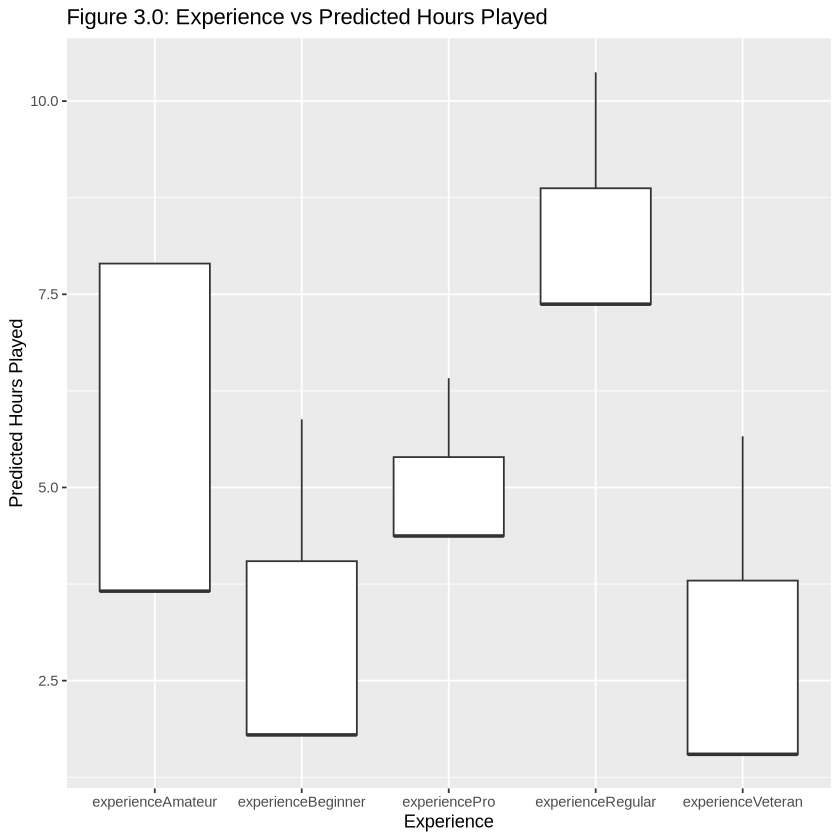

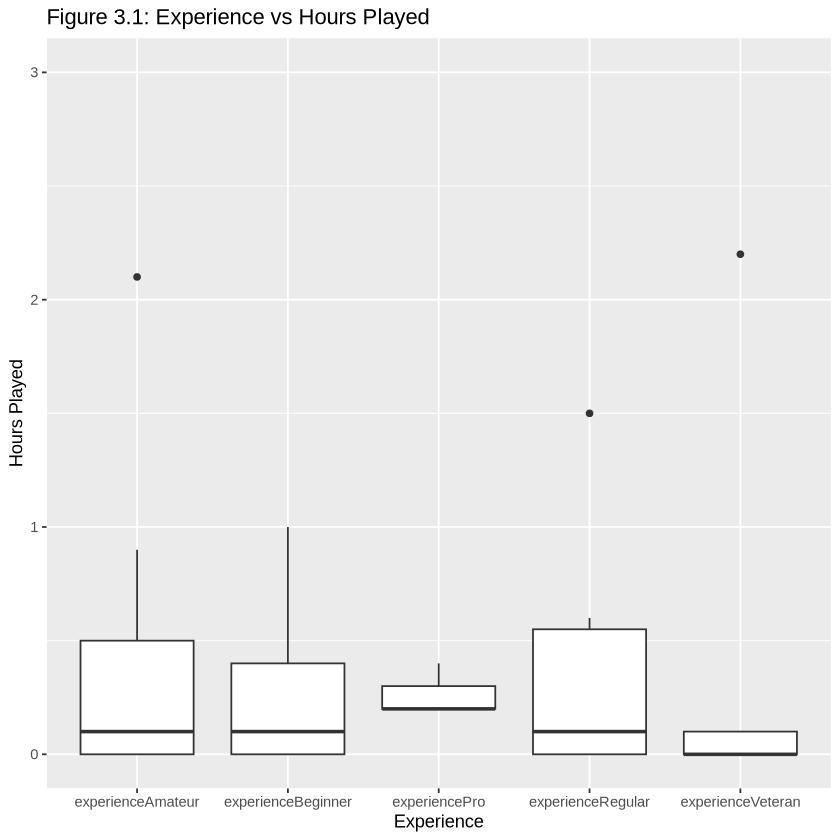

Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


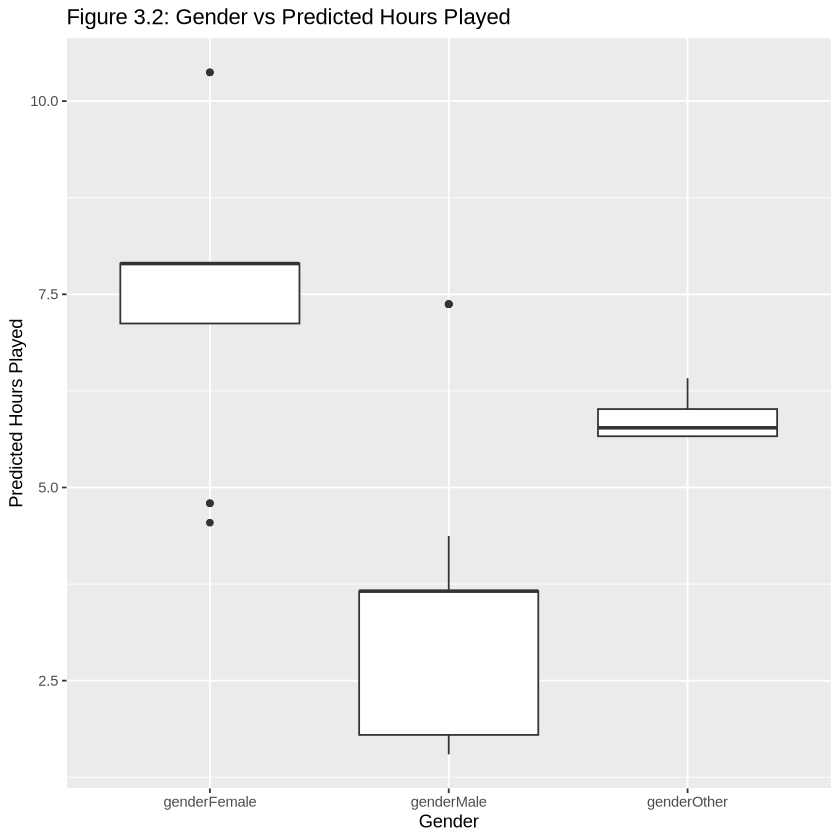

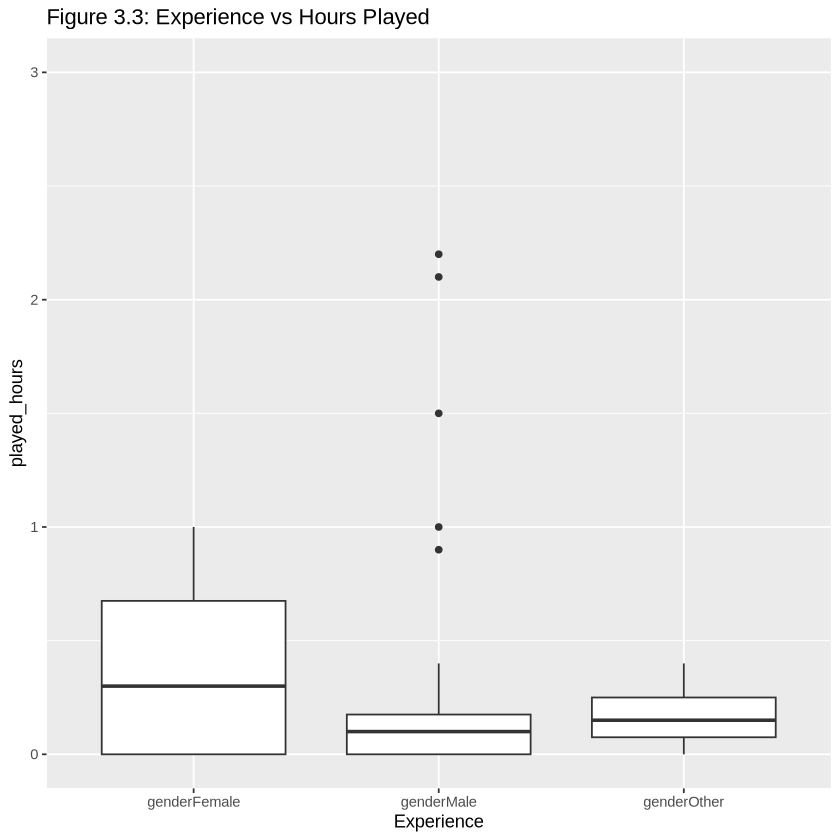

In [73]:
#creating visualizations
plot_pred_exp <- ggplot(minecraft_final, aes(x = experience, y = .pred)) +
              geom_boxplot()+
              labs(title="Figure 3.0: Experience vs Predicted Hours Played",
                  x="Experience",
                  y="Predicted Hours Played")

plot_real_exp <- ggplot(minecraft_final, aes(x = experience, y = played_hours)) +
              geom_boxplot()+
              ylim(0,3)+
              labs(title="Figure 3.1: Experience vs Hours Played",
                  x="Experience",
                  y="Hours Played")

plot_pred_exp
plot_real_exp

plot_pred_gen <- ggplot(minecraft_final, aes(x = gender, y = .pred)) +
              geom_boxplot()+   
            labs(title="Figure 3.2: Gender vs Predicted Hours Played",
                  x="Gender",
                  y="Predicted Hours Played")

plot_real_gen <- ggplot(minecraft_final, aes(x = gender, y = played_hours)) +
              geom_boxplot()+
              ylim(0,3)+
              labs(title="Figure 3.3: Experience vs Hours Played",
                  x="Experience",)
plot_pred_gen
plot_real_gen


# Discussion

The expected conclusion is that gender has a greater impact on game time; because of figure 1.2, we think that men may spend more time playing games, but our results show that experience level has a greater impact on game time, and gender is not particularly strong. In the perspective of the regression model, our final model's test error is around 26.0 hours which is close to the RMSPE value of our tuned model (26.11 hours). This means our model appears to work well on new data that it has never seen before. However, a RMSPE value of 26 hours is alot in this scenario. This indicates that gender and experience are not good predictor variables.

Figure 3.0 and 3.1 explore experience vs Played hours. From the graphs, we can see that the predicted hours are far off from the actual played hours of each player. The predicted hours played are much higher than teh actual played hours. The same thing can be said about Figure 3.2 and 3.3, but with gender.

Targeting players is a critical aspect of adjusting future strategies in research and game management. However, focusing solely on players who are likely to provide more data can lead to biased results—unless playtime is the sole metric of interest. Players are a highly dynamic group, so selecting participants through convenience sampling, as done in this project, is practical for research purposes. Nonetheless, this model is robust for identifying players who will contribute more data and playtime, making it a valuable tool for game management and strategy development.
Our research and conclusions may lead to three problems in the future. The first problem is that we focused on players who offer more time, which ignores other players and leads to some bias. The second problem is that linear regression is sensitive to outliers, and it may not be strictly linear, and a few extreme values in the data may reduce the accuracy of the model. The third problem is that there may be many other factors that affect how long a player plays, such as device compatibility or a player's cultural background.